# vision transformer tutorial 

[keras tutorial](https://keras.io/examples/vision/image_classification_with_vision_transformer/)

[youtube explanation of the tutorial](https://www.youtube.com/watch?v=i2_zJ0ANrw0)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Setup

In [81]:
!pip install -U tensorflow-addons

In [12]:
#!pip install numpy

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa


# load data from disk

In [11]:
#!pip install numpy

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

import os
import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import PIL



In [84]:
data_dir_str = 'data/fish_data/images/numbered'
#data_dir_str = "/content/drive/MyDrive/colab_notebooks/data/fish_data/numbered_cropped_raw"

In [85]:
# import images and create x_train, x_test, y_train and y_test 

import os
import numpy as np
from PIL import Image

dim_both = 224
dim_1 = dim_both
dim_2 = dim_both

def load_images_from_folder(folder, dim_1=32, dim_2=32):
    images = []
    labels = []
    target_shape = (dim_1, dim_2, 3)
    classes = os.listdir(folder)
    for cls in classes:
        class_folder = os.path.join(folder, cls)
        if not os.path.isdir(class_folder):
            continue
        for filename in os.listdir(class_folder):
            img = Image.open(os.path.join(class_folder, filename))
            img = img.resize(target_shape[:2])
            img = np.array(img)
            if img.shape == target_shape:
                images.append(img)
                labels.append(cls)
    return np.array(images), np.array(labels)


X, y = load_images_from_folder(data_dir_str, dim_1=224, dim_2=224)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [86]:
type(x_train)

numpy.ndarray

### Adjust y_train and y_test format to work with the vision transfomer model

In [36]:
# define class_names
class_names = ['A73EGS-P', 'CUNWCB-Y', 'Istiophorus_platypterus', 'P1ROZC-Z', 'PQV7DP-S', 'acanthaluteres_brownii', 'acanthaluteres_spilomelanurus', 'acanthaluteres_vittiger', 'acanthistius_cinctus', 'acanthopagrus_australis', 'acanthopagrus_berda', 'acanthopagrus_latus', 'achoerodus_gouldii', 'achoerodus_viridis', 'acreichthys_tomentosus', 'aesopia_cornuta', 'aethaloperca_rogaa', 'alectis_ciliaris', 'alectis_indica', 'alepes_kleinii', 'aluterus_monoceros', 'aluterus_scriptus', 'amanses_scopas', 'anampses_caeruleopunctatus', 'anampses_elegans', 'anampses_femininus', 'anampses_geographicus', 'anampses_lennardi', 'anampses_melanurus', 'anampses_meleagrides', 'anampses_neoguinaicus', 'anampses_twistii', 'anodontostoma_chacunda', 'anyperodon_leucogrammicus', 'aphareus_furca', 'aphareus_rutilans', 'aprion_virescens', 'argyrops_spinifer', 'aseraggodes_melanostictus', 'atractoscion_aequidens', 'atule_mate', 'auxis_rochei', 'auxis_thazard', 'bathylagichthys_greyae', 'beryx_decadactylus', 'bodianus_anthioides', 'bodianus_axillaris', 'bodianus_bilunulatus', 'bodianus_bimaculatus', 'bodianus_diana', 'bodianus_loxozonus', 'bodianus_mesothorax', 'bodianus_perditio', 'bodianus_unimaculatus', 'bodianus_vulpinus', 'bothus_mancus', 'bothus_myriaster', 'bothus_pantherinus', 'brachaluteres_jacksonianus', 'brachirus_orientalis', 'caesioperca_lepidopterus', 'cantherhines_dumerilii', 'cantherhines_fronticinctus', 'cantherhines_pardalis', 'cantheschenia_grandisquamis', 'caprodon_longimanus', 'caprodon_schlegelii', 'carangoides_caeruleopinnatus', 'carangoides_chrysophrys', 'carangoides_equula', 'carangoides_ferdau', 'carangoides_fulvoguttatus', 'carangoides_hedlandensis', 'carangoides_malabaricus', 'carangoides_orthogrammus', 'carangoides_plagiotaenia', 'caranx_ignobilis', 'caranx_lugubris', 'caranx_melampygus', 'caranx_sexfasciatus', 'carcharhinus_albimarginatus', 'carcharhinus_amblyrhynchos', 'carcharhinus_falciformis', 'carcharhinus_galapagensis', 'carcharhinus_limbatus', 'carcharhinus_melanopterus', 'carcharhinus_obscurus', 'carcharhinus_plumbeus', 'carcharhinus_sorrah', 'centroberyx_affinis', 'centrogenys_vaigiensis', 'centroscymnus_coelolepis', 'cephalopholis_argus', 'cephalopholis_boenak', 'cephalopholis_cyanostigma', 'cephalopholis_formosa', 'cephalopholis_igarashiensis', 'cephalopholis_leopardus', 'cephalopholis_microprion', 'cephalopholis_miniata', 'cephalopholis_sexmaculata', 'cephalopholis_sonnerati', 'cephalopholis_spiloparaea', 'chascanopsetta_lugubris', 'cheilinus_chlorourus', 'cheilinus_fasciatus', 'cheilinus_oxycephalus', 'cheilinus_trilobatus', 'cheilinus_undulatus', 'cheilio_inermis', 'cheilodactylus_ephippium', 'cheilodactylus_fuscus', 'cheilodactylus_spectabilis', 'cheilodactylus_vestitus', 'chelidonichthys_kumu', 'chirocentrus_dorab', 'chirocentrus_nudus', 'choerodon_anchorago', 'choerodon_cauteroma', 'choerodon_cyanodus', 'choerodon_fasciatus', 'choerodon_graphicus', 'choerodon_jordani', 'choerodon_rubescens', 'choerodon_schoenleinii', 'choerodon_venustus', 'choerodon_vitta', 'choerodon_zamboangae', 'chromileptes_altivelis', 'cirrhilabrus_bathyphilus', 'cirrhilabrus_condei', 'cirrhilabrus_cyanopleura', 'cirrhilabrus_exquisitus', 'cirrhilabrus_laboutei', 'cirrhilabrus_punctatus', 'cirrhilabrus_scottorum', 'cirrhilabrus_temminckii', 'coris_aygula', 'coris_batuensis', 'coris_bulbifrons', 'coris_caudimacula', 'coris_dorsomacula', 'coris_gaimard', 'coris_picta', 'coris_pictoides', 'coris_sandeyeri', 'crenimugil_crenilabis', 'cymbacephalus_nematophthalmus', 'cymolutes_praetextatus', 'cymolutes_torquatus', 'cynoglossus_puncticeps', 'cyttopsis_rosea', 'dactylophora_nigricans', 'decapterus_macrosoma', 'decapterus_russelli', 'diproctacanthus_xanthurus', 'dotalabrus_aurantiacus', 'elagatis_bipinnulata', 'epibulus_insidiator', 'epinephelus_areolatus', 'epinephelus_bleekeri', 'epinephelus_chlorostigma', 'epinephelus_coeruleopunctatus', 'epinephelus_coioides', 'epinephelus_corallicola', 'epinephelus_cyanopodus', 'epinephelus_epistictus', 'epinephelus_fasciatus', 'epinephelus_fuscoguttatus', 'epinephelus_hexagonatus', 'epinephelus_howlandi', 'epinephelus_lanceolatus', 'epinephelus_latifasciatus', 'epinephelus_macrospilos', 'epinephelus_maculatus', 'epinephelus_melanostigma', 'epinephelus_merra', 'epinephelus_morrhua', 'epinephelus_multinotatus', 'epinephelus_ongus', 'epinephelus_polyphekadion', 'epinephelus_quoyanus', 'epinephelus_radiatus', 'epinephelus_retouti', 'epinephelus_rivulatus', 'epinephelus_sexfasciatus', 'epinephelus_spilotoceps', 'epinephelus_tauvina', 'epinephelus_undulatostriatus', 'etelis_carbunculus', 'etelis_coruscans', 'eubalichthys_cyanoura', 'eubalichthys_mosaicus', 'eupetrichthys_angustipes', 'euthynnus_affinis', 'evistias_acutirostris', 'gempylus_serpens', 'gnathanodon_speciosus', 'gnathodentex_aureolineatus', 'gracila_albomarginata', 'gymnocranius_audleyi', 'gymnocranius_euanus', 'gymnocranius_grandoculis', 'gymnocranius_microdon', 'gymnosarda_unicolor', 'halichoeres_argus', 'halichoeres_biocellatus', 'halichoeres_chloropterus', 'halichoeres_chrysus', 'halichoeres_hartzfeldii', 'halichoeres_hortulanus', 'halichoeres_leucurus', 'halichoeres_margaritaceus', 'halichoeres_marginatus', 'halichoeres_melanochir', 'halichoeres_melanurus', 'halichoeres_melasmapomus', 'halichoeres_miniatus', 'halichoeres_nebulosus', 'halichoeres_nigrescens', 'halichoeres_scapularis', 'halichoeres_trimaculatus', 'harriotta_raleighana', 'hemigymnus_fasciatus', 'hemigymnus_melapterus', 'hemiramphus_far', 'herklotsichthys_quadrimaculatus', 'hologymnosus_annulatus', 'hologymnosus_doliatus', 'hyporhamphus_affinis', 'hyporhamphus_dussumieri', 'inegocia_japonica', 'johnius_borneensis', 'katsuwonus_pelamis', 'labrichthys_unilineatus', 'labroides_bicolor', 'labroides_dimidiatus', 'labroides_pectoralis', 'labropsis_australis', 'labropsis_manabei', 'labropsis_xanthonota', 'latridopsis_forsteri', 'lepidocybium_flavobrunneum', 'leptojulis_cyanopleura', 'lethrinus_amboinensis', 'lethrinus_atkinsoni', 'lethrinus_erythracanthus', 'lethrinus_genivittatus', 'lethrinus_harak', 'lethrinus_lentjan', 'lethrinus_microdon', 'lethrinus_miniatus', 'lethrinus_nebulosus', 'lethrinus_obsoletus', 'lethrinus_olivaceus', 'lethrinus_ornatus', 'lethrinus_rubrioperculatus', 'lethrinus_semicinctus', 'lethrinus_variegatus', 'lethrinus_xanthochilus', 'liopropoma_mitratum', 'liopropoma_susumi', 'liza_subviridis', 'liza_vaigiensis', 'lniistius_aneitensis', 'lniistius_pavo', 'lutjanus_adetii', 'lutjanus_argentimaculatus', 'lutjanus_biguttatus', 'lutjanus_bohar', 'lutjanus_carponotatus', 'lutjanus_decussatus', 'lutjanus_ehrenbergii', 'lutjanus_erythropterus', 'lutjanus_fulviflamma', 'lutjanus_fulvus', 'lutjanus_gibbus', 'lutjanus_johnii', 'lutjanus_kasmira', 'lutjanus_lemniscatus', 'lutjanus_lutjanus', 'lutjanus_malabaricus', 'lutjanus_monostigma', 'lutjanus_quinquelineatus', 'lutjanus_rivulatus', 'lutjanus_russellii', 'lutjanus_sebae', 'lutjanus_semicinctus', 'lutjanus_semicinctus_quoy', 'lutjanus_timoriensis', 'lutjanus_vitta', 'macolor_macularis', 'macolor_niger', 'macropharyngodon_choati', 'macropharyngodon_kuiteri', 'macropharyngodon_meleagris', 'macropharyngodon_negrosensis', 'macropharyngodon_ornatus', 'megalaspis_cordyla', 'meuschenia_australis', 'meuschenia_freycineti', 'meuschenia_galii', 'meuschenia_hippocrepis', 'meuschenia_scaber', 'meuschenia_trachylepis', 'monacanthus_chinensis', 'monotaxis_grandoculis', 'mugim_cephalus', 'naucrates_ductor', 'negaprion_acutidens', 'nemadactylus_douglasii', 'nemipterus_furcosus', 'nemipterus_hexodon', 'nemipterus_peronii', 'netuma_thalassina', 'nibea_soldado', 'notolabrus_fucicola', 'notolabrus_gymnogenis', 'notolabrus_tetricus', 'notorynchus_cepedianus', 'novaculichthys_taeniourus', 'novaculoides_macrolepidotus', 'oedalechilus_labiosus', 'ophthalmolepis_lineolatus', 'otolithes_ruber', 'oxycheilinus_bimaculatus', 'oxycheilinus_celebicus', 'oxycheilinus_digrammus', 'oxycheilinus_unifasciatus', 'oxymonacanthus_longirostris', 'pagrus_auratus', 'paracaesio_kusakarii', 'paracheilinus_filamentosus', 'paraluteres_prionurus', 'paramonacanthus_choirocephalus', 'paraplagusia_bilineata', 'parastromateus_niger', 'pardachirus_hedleyi', 'pardachirus_pavoninus', 'pentapodus_aureofasciatus', 'pentapodus_paradiseus', 'pentapodus_vitta_quoy', 'pervagor_alternans', 'pervagor_aspricaudus', 'pervagor_janthinosoma', 'pervagor_melanocephalus', 'pervagor_nigrolineatus', 'pinjalo_lewisi', 'platycephalus_indicus', 'plectranthias_longimanus', 'plectranthias_nanus', 'plectranthias_winniensis', 'plectropomus_areolatus', 'plectropomus_laevis', 'plectropomus_leopardus', 'plectropomus_maculatus', 'plectropomus_oligacanthus', 'plotosus_lineatus', 'pristipomoides_argyrogrammicus', 'pristipomoides_auricilla', 'pristipomoides_filamentosus', 'pristipomoides_flavipinnis', 'pristipomoides_sieboldii', 'pristipomoides_zonatus', 'promethichthys_prometheus', 'protonibea_diacanthus', 'psettodes_erumei', 'pseudalutarius_nasicornis', 'pseudanthias_bicolor', 'pseudanthias_cooperi', 'pseudanthias_dispar', 'pseudanthias_fasciatus', 'pseudanthias_huchtii', 'pseudanthias_hypselosoma', 'pseudanthias_lori', 'pseudanthias_luzonensis', 'pseudanthias_pictilis', 'pseudanthias_pleurotaenia', 'pseudanthias_rubrizonatus', 'pseudanthias_sheni', 'pseudanthias_smithvanizi', 'pseudanthias_squamipinnis', 'pseudanthias_tuka', 'pseudanthias_ventralis', 'pseudocaranx_dentex', 'pseudocarcharias_kamoharai', 'pseudocheilinus_evanidus', 'pseudocheilinus_hexataenia', 'pseudocheilinus_ocellatus', 'pseudocheilinus_octotaenia', 'pseudodax_moluccanus', 'pseudojuloides_cerasinus', 'pseudolabrus_biserialis', 'pseudolabrus_guentheri', 'pseudolabrus_luculentus', 'pseudorhombus_argus', 'pseudorhombus_arsius', 'pseudorhombus_elevatus', 'pteragogus_cryptus', 'pteragogus_enneacanthus', 'pteragogus_flagellifer', 'rastrelliger_kanagurta', 'retropinna_semoni', 'rhabdosargus_sarba', 'rhincodon_typus', 'rhizoprionodon_acutus', 'ruvettus_pretiosus', 'samaris_cristatus', 'samariscus_triocellatus', 'sarda_orientalis', 'sardinella_albella', 'sardinella_gibbosa', 'sardinops_sagax', 'scaevius_milii', 'scolopsis_affinis', 'scolopsis_bilineata', 'scolopsis_lineata', 'scolopsis_margaritifer', 'scolopsis_monogramma', 'scolopsis_trilineata', 'scolopsis_vosmeri', 'scolopsis_xenochrous', 'scomberoides_commersonnianus', 'scomberoides_lysan', 'scomberomorus_commerson', 'selar_crumenophthalmus', 'selaroides_leptolepis', 'seriola_dumerili', 'seriola_hippos', 'seriola_rivoliana', 'seriolina_nigrofasciata', 'serranocirrhitus_latus', 'sillago_ciliata', 'sillago_sihama', 'soleichthys_heterorhinos', 'sphyraena_barracuda', 'sphyraena_forsteri', 'sphyraena_jello', 'sphyraena_obtusata', 'stegostoma_fasciatum', 'stethojulis_bandanensis', 'stethojulis_interrupta', 'stethojulis_strigiventer', 'stethojulis_trilineata', 'stolephorus_waitei', 'suezichthys_arquatus', 'suezichthys_cyanolaemus', 'suezichthys_gracilis', 'symphorichthys_spilurus', 'symphorus_nematophorus', 'thalassoma_amblycephalum', 'thalassoma_hardwicke', 'thalassoma_jansenii', 'thalassoma_lunare', 'thalassoma_lutescens', 'thalassoma_nigrofasciatum', 'thalassoma_purpureum', 'thalassoma_quinquevittatum', 'thalassoma_trilobatum', 'thryssa_baelama', 'thryssa_hamiltonii', 'thunnus_alalunga', 'thunnus_albacares', 'thysanophrys_celebica', 'thysanophrys_chiltonae', 'trachichthys_australis', 'trachinotus_baillonii', 'trachinotus_blochii', 'trachinotus_botla', 'trachypoma_macracanthus', 'triaenodon_obesus', 'uraspis_secunda', 'valamugil_cunnesius', 'valamugil_engeli', 'valamugil_seheli', 'variola_albimarginata', 'variola_louti', 'wattsia_mossambica', 'wetmorella_albofasciata', 'wetmorella_nigropinnata', 'xiphocheilus_typus', 'zenarchopterus_dispar', 'zeus_faber']

In [37]:
len(class_names)

483

In [38]:
# creating a dictionary to transorm y to integers
class_dict = {key: idx for idx, key in enumerate(class_names)}

In [39]:
# defining a function to translate y_train and y_test
def lookup_dict(input):
    list = []
    for i in input:
        list.append(class_dict[i])
    return np.asarray(list)

In [40]:
# translating

y_train = lookup_dict(y_train)
y_test = lookup_dict(y_test)


In [41]:
# make y labels a list of lists
def make_list_of_lists(input):
    list = []
    for i in input:
        list.append([i])
    return np.asarray(list)
    

In [42]:
#call function on y_train and y_test

y_train = make_list_of_lists(y_train)
y_test = make_list_of_lists(y_test)


In [43]:
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (3301, 224, 224, 3) - y_train shape: (3301, 1)
x_test shape: (826, 224, 224, 3) - y_test shape: (826, 1)


In [45]:
len(y_test)

826

In [46]:
len(y_train)

3301

# Create model

### Configure the hyperparameters

<div> <img src="images/hyperparameters_vit_keras_tutorial.png" alt="Drawing" style="width: 400px;"/></div> 

In [17]:
 
num_classes = 483
input_shape = (224, 224, 3)


learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128
num_epochs = 80
#num_epochs = 3

image_size = 128  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 96
num_heads = 5
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 9
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier


### Use data augmentation

In [74]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


### Implement multilayer perceptron (MLP)

In [75]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


### Implement patch creation as a layer

In [76]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


### Let's display patches for a sample image

Image size: 128 X 128
Patch size: 6 X 6
Patches per image: 441
Elements per patch: 108


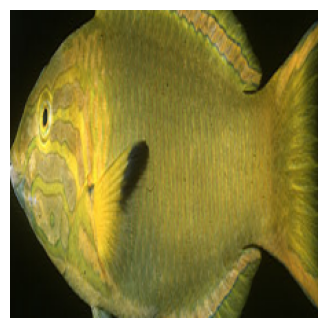

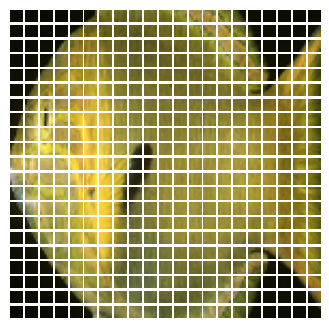

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")


### Implement the patch encoding layer

The PatchEncoder layer will linearly transform a patch by projecting it into a vector of size projection_dim. In addition, it adds a learnable position embedding to the projected vector.

In [78]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


# Build the ViT model

The ViT model consists of multiple Transformer blocks, which use the layers.MultiHeadAttention layer as a self-attention mechanism applied to the sequence of patches. The Transformer blocks produce a [batch_size, num_patches, projection_dim] tensor, which is processed via an classifier head with softmax to produce the final class probabilities output.

Unlike the technique described in the paper, which prepends a learnable embedding to the sequence of encoded patches to serve as the image representation, all the outputs of the final Transformer block are reshaped with layers.Flatten() and used as the image representation input to the classifier head. Note that the layers.GlobalAveragePooling1D layer could also be used instead to aggregate the outputs of the Transformer block, especially when the number of patches and the projection dimensions are large.

In [79]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


### Compile, train, and evaluate the mode

In [80]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa


def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


Epoch 1/80


24/24 [==============================] - 765s 31s/step - loss: 8.5773 - accuracy: 0.0030 - top-5-accuracy: 0.0131 - val_loss: 6.2087 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 0.0030
Epoch 2/80
24/24 [==============================] - 765s 32s/step - loss: 6.4140 - accuracy: 0.0034 - top-5-accuracy: 0.0199 - val_loss: 6.1774 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 0.0121
Epoch 3/80
24/24 [==============================] - 754s 31s/step - loss: 6.2775 - accuracy: 0.0044 - top-5-accuracy: 0.0162 - val_loss: 6.1742 - val_accuracy: 0.0060 - val_top-5-accuracy: 0.0272
Epoch 4/80
24/24 [==============================] - 761s 32s/step - loss: 6.1989 - accuracy: 0.0027 - top-5-accuracy: 0.0175 - val_loss: 6.1669 - val_accuracy: 0.0030 - val_top-5-accuracy: 0.0060
Epoch 5/80
24/24 [==============================] - 747s 31s/step - loss: 6.1900 - accuracy: 0.0054 - top-5-accuracy: 0.0209 - val_loss: 6.1627 - val_accuracy: 0.0060 - val_top-5-accuracy: 0.0211
Epoch 6/80
24/24 [=====

KeyboardInterrupt: 

In [ ]:
model_dir = 'models/vit_classifier'
vit_classifier.save(model_dir)

In [15]:
# visualize training function

def visualize_training(model,epochs,  accuracy='categorical_accuracy'):
    acc = history.history[accuracy]
    val_acc_name = 'val_' + accuracy
    val_acc = history.history[val_acc_name]

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)
    
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    return plt.show()

visualize_training(vit_classifier,num_epochs,'accuracy')

NameError: name 'vit_classifier' is not defined

# Whole-model saving & loading - SavedModel

There are two formats you can use to save an entire model to disk: the TensorFlow SavedModel format, and the older Keras H5 format. The recommended format is SavedModel. It is the default when you use model.save().


You can save an entire model to a single artifact. It will include:

    * The model's architecture/config
    * The model's weight values (which were learned during training)
    * The model's compilation information (if compile() was called)
    * The optimizer and its state, if any (this enables you to restart training where you left)

APIs

    * model.save() or tf.keras.models.save_model()
    * tf.keras.models.load_model()

You can switch to the H5 format by:

    * Passing save_format='h5' to save().
    * Passing a filename that ends in .h5 or .keras to save().

In [1]:
!pip install keras

In [2]:
!pip install tensorflow-macos

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

/Users/nlory/.pyenv/versions/3.9.8/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
model_dir = 'models/230202_vit_classifier'
img_dim_1, img_dim_2 = 32, 32

In [9]:
# used to save the model
# vit_classifier.save(model_dir)

In [13]:
model = keras.models.load_model(model_dir)

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

class_names = ['A73EGS-P', 'CUNWCB-Y', 'Istiophorus_platypterus', 'P1ROZC-Z', 'PQV7DP-S', 'acanthaluteres_brownii', 'acanthaluteres_spilomelanurus', 'acanthaluteres_vittiger', 'acanthistius_cinctus', 'Acanthopagrus australis', 'Acanthopagrus berda', 'acanthopagrus_latus', 'achoerodus_gouldii', 'achoerodus_viridis', 'acreichthys_tomentosus', 'aesopia_cornuta', 'aethaloperca_rogaa', 'alectis_ciliaris', 'alectis_indica', 'alepes_kleinii', 'aluterus_monoceros', 'aluterus_scriptus', 'amanses_scopas', 'anampses_caeruleopunctatus', 'anampses_elegans', 'anampses_femininus', 'anampses_geographicus', 'anampses_lennardi', 'anampses_melanurus', 'anampses_meleagrides', 'anampses_neoguinaicus', 'anampses_twistii', 'anodontostoma_chacunda', 'anyperodon_leucogrammicus', 'aphareus_furca', 'aphareus_rutilans', 'aprion_virescens', 'argyrops_spinifer', 'aseraggodes_melanostictus', 'atractoscion_aequidens', 'atule_mate', 'auxis_rochei', 'auxis_thazard', 'bathylagichthys_greyae', 'beryx_decadactylus', 'bodianus_anthioides', 'bodianus_axillaris', 'bodianus_bilunulatus', 'bodianus_bimaculatus', 'bodianus_diana', 'bodianus_loxozonus', 'bodianus_mesothorax', 'bodianus_perditio', 'bodianus_unimaculatus', 'bodianus_vulpinus', 'bothus_mancus', 'bothus_myriaster', 'bothus_pantherinus', 'brachaluteres_jacksonianus', 'brachirus_orientalis', 'caesioperca_lepidopterus', 'cantherhines_dumerilii', 'cantherhines_fronticinctus', 'cantherhines_pardalis', 'cantheschenia_grandisquamis', 'caprodon_longimanus', 'caprodon_schlegelii', 'carangoides_caeruleopinnatus', 'carangoides_chrysophrys', 'carangoides_equula', 'carangoides_ferdau', 'carangoides_fulvoguttatus', 'carangoides_hedlandensis', 'carangoides_malabaricus', 'carangoides_orthogrammus', 'carangoides_plagiotaenia', 'caranx_ignobilis', 'caranx_lugubris', 'caranx_melampygus', 'caranx_sexfasciatus', 'carcharhinus_albimarginatus', 'carcharhinus_amblyrhynchos', 'carcharhinus_falciformis', 'carcharhinus_galapagensis', 'carcharhinus_limbatus', 'carcharhinus_melanopterus', 'carcharhinus_obscurus', 'carcharhinus_plumbeus', 'carcharhinus_sorrah', 'centroberyx_affinis', 'centrogenys_vaigiensis', 'centroscymnus_coelolepis', 'cephalopholis_argus', 'cephalopholis_boenak', 'cephalopholis_cyanostigma', 'cephalopholis_formosa', 'cephalopholis_igarashiensis', 'cephalopholis_leopardus', 'cephalopholis_microprion', 'cephalopholis_miniata', 'cephalopholis_sexmaculata', 'cephalopholis_sonnerati', 'cephalopholis_spiloparaea', 'chascanopsetta_lugubris', 'cheilinus_chlorourus', 'cheilinus_fasciatus', 'cheilinus_oxycephalus', 'cheilinus_trilobatus', 'cheilinus_undulatus', 'cheilio_inermis', 'cheilodactylus_ephippium', 'cheilodactylus_fuscus', 'cheilodactylus_spectabilis', 'cheilodactylus_vestitus', 'chelidonichthys_kumu', 'chirocentrus_dorab', 'chirocentrus_nudus', 'choerodon_anchorago', 'choerodon_cauteroma', 'choerodon_cyanodus', 'choerodon_fasciatus', 'choerodon_graphicus', 'choerodon_jordani', 'choerodon_rubescens', 'choerodon_schoenleinii', 'choerodon_venustus', 'choerodon_vitta', 'choerodon_zamboangae', 'chromileptes_altivelis', 'cirrhilabrus_bathyphilus', 'cirrhilabrus_condei', 'cirrhilabrus_cyanopleura', 'cirrhilabrus_exquisitus', 'cirrhilabrus_laboutei', 'cirrhilabrus_punctatus', 'cirrhilabrus_scottorum', 'cirrhilabrus_temminckii', 'coris_aygula', 'coris_batuensis', 'coris_bulbifrons', 'coris_caudimacula', 'coris_dorsomacula', 'coris_gaimard', 'coris_picta', 'coris_pictoides', 'coris_sandeyeri', 'crenimugil_crenilabis', 'cymbacephalus_nematophthalmus', 'cymolutes_praetextatus', 'cymolutes_torquatus', 'cynoglossus_puncticeps', 'cyttopsis_rosea', 'dactylophora_nigricans', 'decapterus_macrosoma', 'decapterus_russelli', 'diproctacanthus_xanthurus', 'dotalabrus_aurantiacus', 'elagatis_bipinnulata', 'epibulus_insidiator', 'epinephelus_areolatus', 'epinephelus_bleekeri', 'epinephelus_chlorostigma', 'epinephelus_coeruleopunctatus', 'epinephelus_coioides', 'epinephelus_corallicola', 'epinephelus_cyanopodus', 'epinephelus_epistictus', 'epinephelus_fasciatus', 'epinephelus_fuscoguttatus', 'epinephelus_hexagonatus', 'epinephelus_howlandi', 'epinephelus_lanceolatus', 'epinephelus_latifasciatus', 'epinephelus_macrospilos', 'epinephelus_maculatus', 'epinephelus_melanostigma', 'epinephelus_merra', 'epinephelus_morrhua', 'epinephelus_multinotatus', 'epinephelus_ongus', 'epinephelus_polyphekadion', 'epinephelus_quoyanus', 'epinephelus_radiatus', 'epinephelus_retouti', 'epinephelus_rivulatus', 'epinephelus_sexfasciatus', 'epinephelus_spilotoceps', 'epinephelus_tauvina', 'epinephelus_undulatostriatus', 'etelis_carbunculus', 'etelis_coruscans', 'eubalichthys_cyanoura', 'eubalichthys_mosaicus', 'eupetrichthys_angustipes', 'euthynnus_affinis', 'evistias_acutirostris', 'gempylus_serpens', 'gnathanodon_speciosus', 'gnathodentex_aureolineatus', 'gracila_albomarginata', 'gymnocranius_audleyi', 'gymnocranius_euanus', 'gymnocranius_grandoculis', 'gymnocranius_microdon', 'gymnosarda_unicolor', 'halichoeres_argus', 'halichoeres_biocellatus', 'halichoeres_chloropterus', 'halichoeres_chrysus', 'halichoeres_hartzfeldii', 'halichoeres_hortulanus', 'halichoeres_leucurus', 'halichoeres_margaritaceus', 'halichoeres_marginatus', 'halichoeres_melanochir', 'halichoeres_melanurus', 'halichoeres_melasmapomus', 'halichoeres_miniatus', 'halichoeres_nebulosus', 'halichoeres_nigrescens', 'halichoeres_scapularis', 'halichoeres_trimaculatus', 'harriotta_raleighana', 'hemigymnus_fasciatus', 'hemigymnus_melapterus', 'hemiramphus_far', 'herklotsichthys_quadrimaculatus', 'hologymnosus_annulatus', 'hologymnosus_doliatus', 'hyporhamphus_affinis', 'hyporhamphus_dussumieri', 'inegocia_japonica', 'johnius_borneensis', 'katsuwonus_pelamis', 'labrichthys_unilineatus', 'labroides_bicolor', 'labroides_dimidiatus', 'labroides_pectoralis', 'labropsis_australis', 'labropsis_manabei', 'labropsis_xanthonota', 'latridopsis_forsteri', 'lepidocybium_flavobrunneum', 'leptojulis_cyanopleura', 'lethrinus_amboinensis', 'lethrinus_atkinsoni', 'lethrinus_erythracanthus', 'lethrinus_genivittatus', 'lethrinus_harak', 'lethrinus_lentjan', 'lethrinus_microdon', 'lethrinus_miniatus', 'lethrinus_nebulosus', 'lethrinus_obsoletus', 'lethrinus_olivaceus', 'lethrinus_ornatus', 'lethrinus_rubrioperculatus', 'lethrinus_semicinctus', 'lethrinus_variegatus', 'lethrinus_xanthochilus', 'liopropoma_mitratum', 'liopropoma_susumi', 'liza_subviridis', 'liza_vaigiensis', 'lniistius_aneitensis', 'lniistius_pavo', 'lutjanus_adetii', 'lutjanus_argentimaculatus', 'lutjanus_biguttatus', 'lutjanus_bohar', 'lutjanus_carponotatus', 'lutjanus_decussatus', 'lutjanus_ehrenbergii', 'lutjanus_erythropterus', 'lutjanus_fulviflamma', 'lutjanus_fulvus', 'lutjanus_gibbus', 'lutjanus_johnii', 'lutjanus_kasmira', 'lutjanus_lemniscatus', 'lutjanus_lutjanus', 'lutjanus_malabaricus', 'lutjanus_monostigma', 'lutjanus_quinquelineatus', 'lutjanus_rivulatus', 'lutjanus_russellii', 'lutjanus_sebae', 'lutjanus_semicinctus', 'lutjanus_semicinctus_quoy', 'lutjanus_timoriensis', 'lutjanus_vitta', 'macolor_macularis', 'macolor_niger', 'macropharyngodon_choati', 'macropharyngodon_kuiteri', 'macropharyngodon_meleagris', 'macropharyngodon_negrosensis', 'macropharyngodon_ornatus', 'megalaspis_cordyla', 'meuschenia_australis', 'meuschenia_freycineti', 'meuschenia_galii', 'meuschenia_hippocrepis', 'meuschenia_scaber', 'meuschenia_trachylepis', 'monacanthus_chinensis', 'monotaxis_grandoculis', 'mugim_cephalus', 'naucrates_ductor', 'negaprion_acutidens', 'nemadactylus_douglasii', 'nemipterus_furcosus', 'nemipterus_hexodon', 'nemipterus_peronii', 'netuma_thalassina', 'nibea_soldado', 'notolabrus_fucicola', 'notolabrus_gymnogenis', 'notolabrus_tetricus', 'notorynchus_cepedianus', 'novaculichthys_taeniourus', 'novaculoides_macrolepidotus', 'oedalechilus_labiosus', 'ophthalmolepis_lineolatus', 'otolithes_ruber', 'oxycheilinus_bimaculatus', 'oxycheilinus_celebicus', 'oxycheilinus_digrammus', 'oxycheilinus_unifasciatus', 'oxymonacanthus_longirostris', 'pagrus_auratus', 'paracaesio_kusakarii', 'paracheilinus_filamentosus', 'paraluteres_prionurus', 'paramonacanthus_choirocephalus', 'paraplagusia_bilineata', 'parastromateus_niger', 'pardachirus_hedleyi', 'pardachirus_pavoninus', 'pentapodus_aureofasciatus', 'pentapodus_paradiseus', 'pentapodus_vitta_quoy', 'pervagor_alternans', 'pervagor_aspricaudus', 'pervagor_janthinosoma', 'pervagor_melanocephalus', 'pervagor_nigrolineatus', 'pinjalo_lewisi', 'platycephalus_indicus', 'plectranthias_longimanus', 'plectranthias_nanus', 'plectranthias_winniensis', 'plectropomus_areolatus', 'plectropomus_laevis', 'plectropomus_leopardus', 'plectropomus_maculatus', 'plectropomus_oligacanthus', 'plotosus_lineatus', 'pristipomoides_argyrogrammicus', 'pristipomoides_auricilla', 'pristipomoides_filamentosus', 'pristipomoides_flavipinnis', 'pristipomoides_sieboldii', 'pristipomoides_zonatus', 'promethichthys_prometheus', 'protonibea_diacanthus', 'psettodes_erumei', 'pseudalutarius_nasicornis', 'pseudanthias_bicolor', 'pseudanthias_cooperi', 'pseudanthias_dispar', 'pseudanthias_fasciatus', 'pseudanthias_huchtii', 'pseudanthias_hypselosoma', 'pseudanthias_lori', 'pseudanthias_luzonensis', 'pseudanthias_pictilis', 'pseudanthias_pleurotaenia', 'pseudanthias_rubrizonatus', 'pseudanthias_sheni', 'pseudanthias_smithvanizi', 'pseudanthias_squamipinnis', 'pseudanthias_tuka', 'pseudanthias_ventralis', 'pseudocaranx_dentex', 'pseudocarcharias_kamoharai', 'pseudocheilinus_evanidus', 'pseudocheilinus_hexataenia', 'pseudocheilinus_ocellatus', 'pseudocheilinus_octotaenia', 'pseudodax_moluccanus', 'pseudojuloides_cerasinus', 'pseudolabrus_biserialis', 'pseudolabrus_guentheri', 'pseudolabrus_luculentus', 'pseudorhombus_argus', 'pseudorhombus_arsius', 'pseudorhombus_elevatus', 'pteragogus_cryptus', 'pteragogus_enneacanthus', 'pteragogus_flagellifer', 'rastrelliger_kanagurta', 'retropinna_semoni', 'rhabdosargus_sarba', 'rhincodon_typus', 'rhizoprionodon_acutus', 'ruvettus_pretiosus', 'samaris_cristatus', 'samariscus_triocellatus', 'sarda_orientalis', 'sardinella_albella', 'sardinella_gibbosa', 'sardinops_sagax', 'scaevius_milii', 'scolopsis_affinis', 'scolopsis_bilineata', 'scolopsis_lineata', 'scolopsis_margaritifer', 'scolopsis_monogramma', 'scolopsis_trilineata', 'scolopsis_vosmeri', 'scolopsis_xenochrous', 'scomberoides_commersonnianus', 'scomberoides_lysan', 'scomberomorus_commerson', 'selar_crumenophthalmus', 'selaroides_leptolepis', 'seriola_dumerili', 'seriola_hippos', 'seriola_rivoliana', 'seriolina_nigrofasciata', 'serranocirrhitus_latus', 'sillago_ciliata', 'sillago_sihama', 'soleichthys_heterorhinos', 'sphyraena_barracuda', 'sphyraena_forsteri', 'sphyraena_jello', 'sphyraena_obtusata', 'stegostoma_fasciatum', 'stethojulis_bandanensis', 'stethojulis_interrupta', 'stethojulis_strigiventer', 'stethojulis_trilineata', 'stolephorus_waitei', 'suezichthys_arquatus', 'suezichthys_cyanolaemus', 'suezichthys_gracilis', 'symphorichthys_spilurus', 'symphorus_nematophorus', 'thalassoma_amblycephalum', 'thalassoma_hardwicke', 'thalassoma_jansenii', 'thalassoma_lunare', 'thalassoma_lutescens', 'thalassoma_nigrofasciatum', 'thalassoma_purpureum', 'thalassoma_quinquevittatum', 'thalassoma_trilobatum', 'thryssa_baelama', 'thryssa_hamiltonii', 'thunnus_alalunga', 'thunnus_albacares', 'thysanophrys_celebica', 'thysanophrys_chiltonae', 'trachichthys_australis', 'trachinotus_baillonii', 'trachinotus_blochii', 'trachinotus_botla', 'trachypoma_macracanthus', 'triaenodon_obesus', 'uraspis_secunda', 'valamugil_cunnesius', 'valamugil_engeli', 'valamugil_seheli', 'variola_albimarginata', 'variola_louti', 'wattsia_mossambica', 'wetmorella_albofasciata', 'wetmorella_nigropinnata', 'xiphocheilus_typus', 'zenarchopterus_dispar', 'zeus_faber']
class_dict = {key: idx for idx, key in enumerate(class_names)}
# Load the model
#model = keras.models.load_model('model.h5')

# Load the image and resize it to (224, 224)
img = image.load_img('data/fish_data/images/numbered/acanthopagrus_berda/43.png', target_size=(img_dim_1, img_dim_2))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the shape of the image array from (224, 224, 3) to (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the pixel values from [0, 255] to [-1, 1]
img_array = (img_array / 127.5) - 1

# Use the model to make a prediction
predictions = model.predict(img_array)

# Get the class with the highest prediction probability
class_index = np.argmax(predictions[0])

# creating a new dictionary
# list out keys and values separately
def translate_class_index(class_index):
    key_list = list(class_dict.keys())
    val_list = list(class_dict.values())
    # print key
    position = val_list.index(class_index)
    return key_list[position]

# Print the predicted class
print("Predicted class:", class_index, '-', translate_class_index(class_index))


1/1 [==============================] - 1s 514ms/step
Predicted class: 470 - triaenodon_obesus
